### CAR PRICE PREDICTION WITH PYTHON

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [26]:
# Import packages and classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [3]:
#Read car price prediction data
carData = pd.read_csv('Car_Price.csv')
carData.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Processing

In [4]:
carData.shape

(301, 9)

Has 301 columns and 9 rows

In [5]:
carData.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [7]:
#Checking for missing value
carData.isnull().values.any()
carData.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
carData['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [10]:
carData['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [11]:
carData['Selling_Price'].value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

In [12]:
carData['Present_Price'].value_counts()

9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: Present_Price, Length: 148, dtype: int64

In [14]:
carData['Driven_kms'].value_counts()

45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: Driven_kms, Length: 206, dtype: int64

### Categorical columns


In [16]:
categorical_cols=carData.select_dtypes(include=['object']).columns

In [17]:
carData[categorical_cols].head(5)

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


### Numerical columns

In [19]:
numerical_cols=carData.select_dtypes(exclude=['object']).columns

In [20]:
carData[numerical_cols].head(5)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


### Exploratory Data Analysis

In [21]:
# Print mathematical description
carData.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


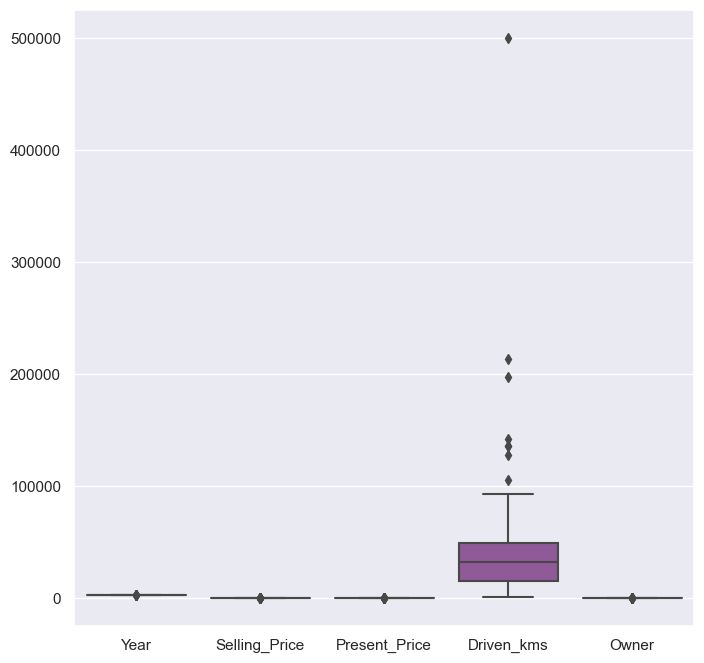

In [29]:
#Outlier analysis through boxlot
ax = sns.boxplot(data=carData,orient='v',palette="Set1")

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Driven_kms'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

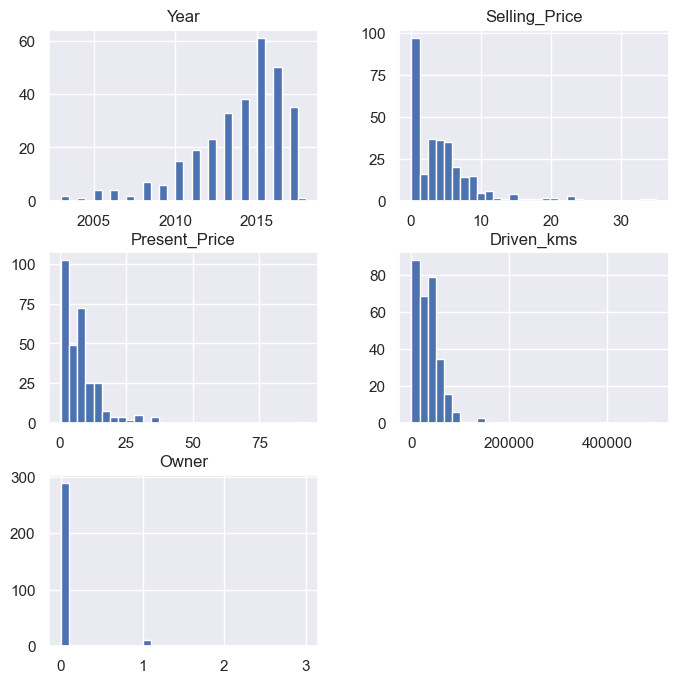

In [32]:
carData.hist(bins=30)

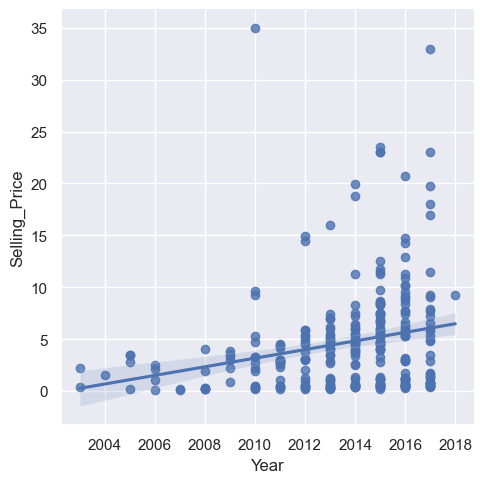

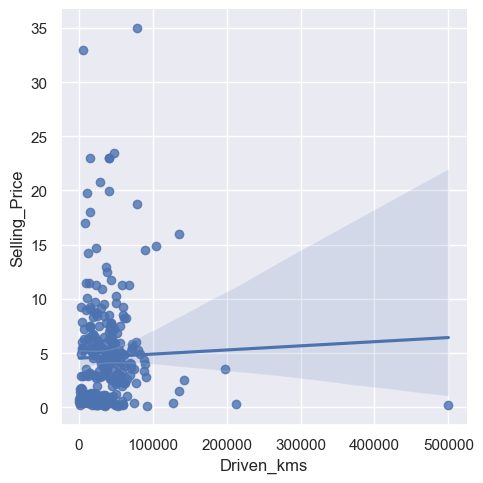

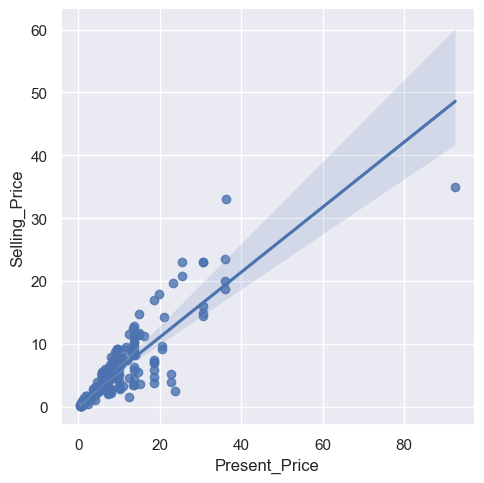

In [33]:
sns.lmplot(x='Year', y='Selling_Price', data=carData)
sns.lmplot(x='Driven_kms', y='Selling_Price', data=carData)
sns.lmplot(x='Present_Price',y= 'Selling_Price', data=carData)

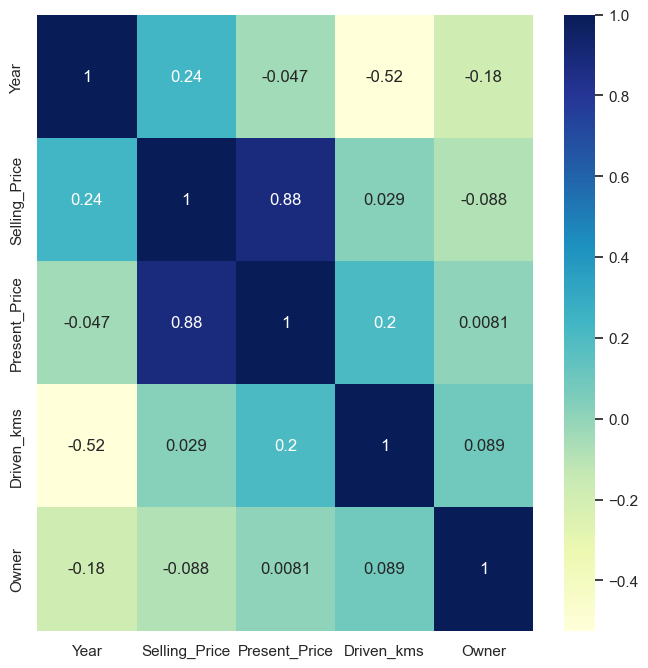

In [34]:
#correlation plot/matrix
corr = carData.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True);

### Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [36]:
X=carData[numerical_cols].drop('Selling_Price',axis=1)
y=carData['Selling_Price']

### Recursive feature elimination (RFE) with random forest¶


In [39]:
X = carData.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['Car_Name','Selling_Price'],axis=1)
y=carData['Selling_Price']

In [40]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')


In [41]:
features=list(X.columns[rfe.support_])

### Data Modelling

In [42]:
x = X[features]
y = carData.Selling_Price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

### Linear Regression


In [43]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7253920797521561

### Decision Tree Regressor


In [44]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.9089699275493155

### Random Forest regressor


In [45]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

C:\Users\F5164729\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.9206583033587228

### Conclusion

We applied three models Linear Regression, Decision Tree Regressor,and RandomForest Regressor
As we can see Random Forest performing best (with accuracy ~ 0.92)